# Lab 8: Define and Solve an ML Problem of Your Choosing

In [50]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [51]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

### Problem Definition

#### 1. Data Set: WHR2018Chapter2OnlineData.csv

#### 2. What will you be predicting? What is the label?
In this unsupervised learning problem, I am aiming to discover inherent groupings of countries based on their well-being indicators. Unlike supervised learning, there isn't a pre-defined target label. Instead, the K-Means algorithm will generate clusters, and I will interpret these clusters as "labels" that represent different profiles of countries based on their happiness attributes.

***NOTE**: I use the information gained from the clusters to do a supervised learning problem. See the part after the cluster analysis.*

#### 3. What type of ML problem is this?
- Type: Unsupervised learning
- Subtype: Clustering
- Method: K-Means clustering

#### 4. Features:
- Log GDP per capita
- Social support
- Healthy life expectancy at birth
- Freedom to make life choices
- Generosity
- Perceptions of corruption

#### 5. Explain why this is an important problem:
Clustering countries based on these well-being indicators allows researchers, policymakers, and economists to:
- Identify groups of nations with similar social and economic patterns
- Inform targeted policy recommendations for improving well-being
- Understand regional or developmental disparities in quality of life

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [52]:
print(df.isnull().sum())

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [53]:
features = [
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

In [54]:
df_clean = df.dropna(subset=features)

In [55]:
df_clean[features].describe()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
count,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,9.162977,0.808117,62.034951,0.724221,0.001355,0.756901
std,1.182036,0.120739,8.134110,0.146740,0.163797,0.185473
min,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198
25%,8.220314,0.742406,56.650225,0.628026,-0.112022,0.701892
50%,9.337858,0.831412,63.667147,0.738954,-0.020863,0.810821
75%,10.107059,0.904170,68.020285,0.840636,0.095651,0.880647
max,11.670484,0.987343,76.536362,0.985178,0.669334,0.983276


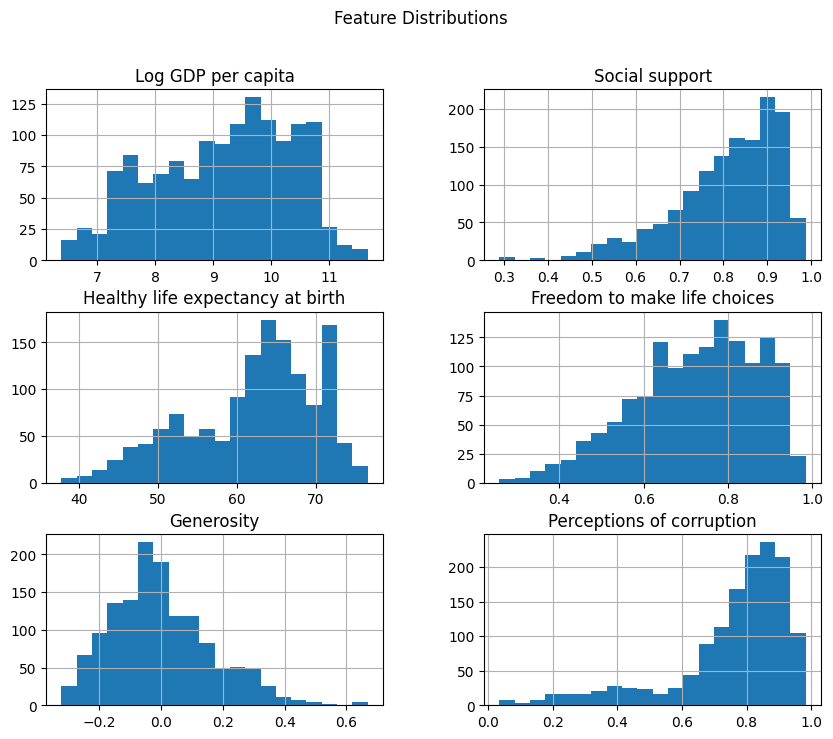

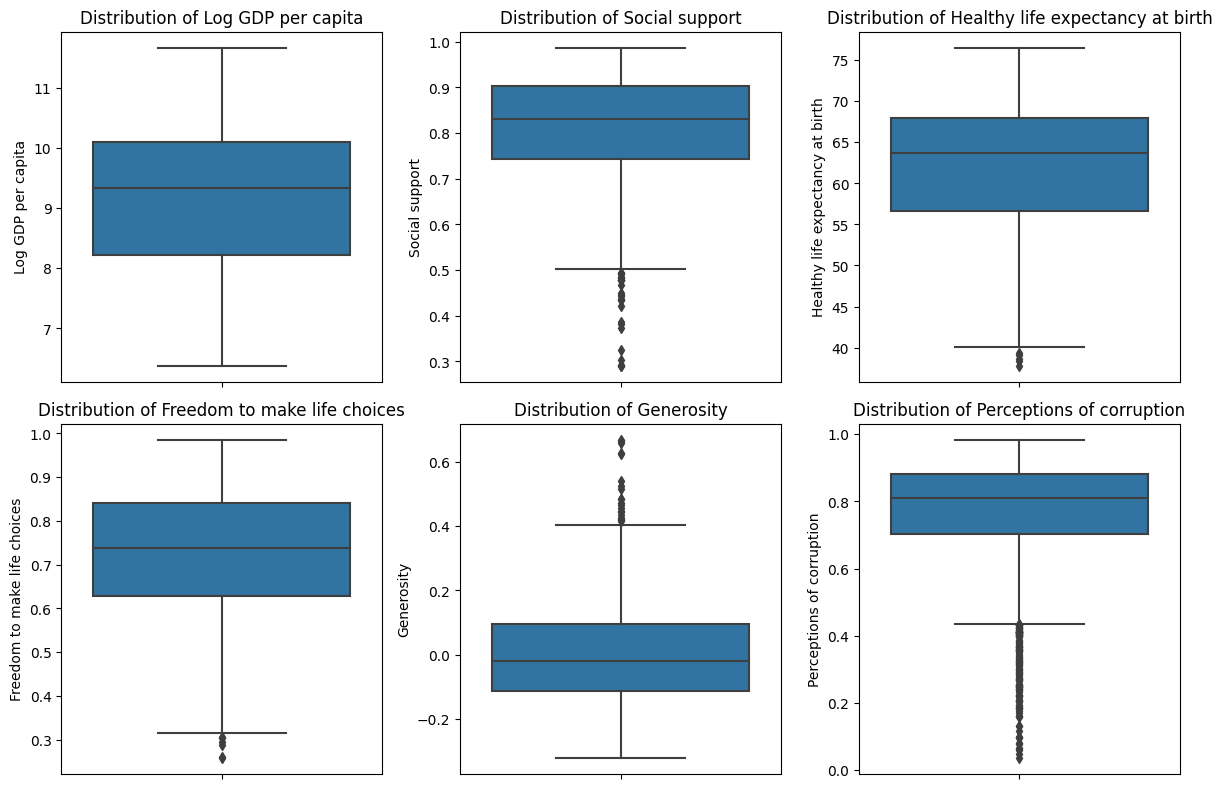

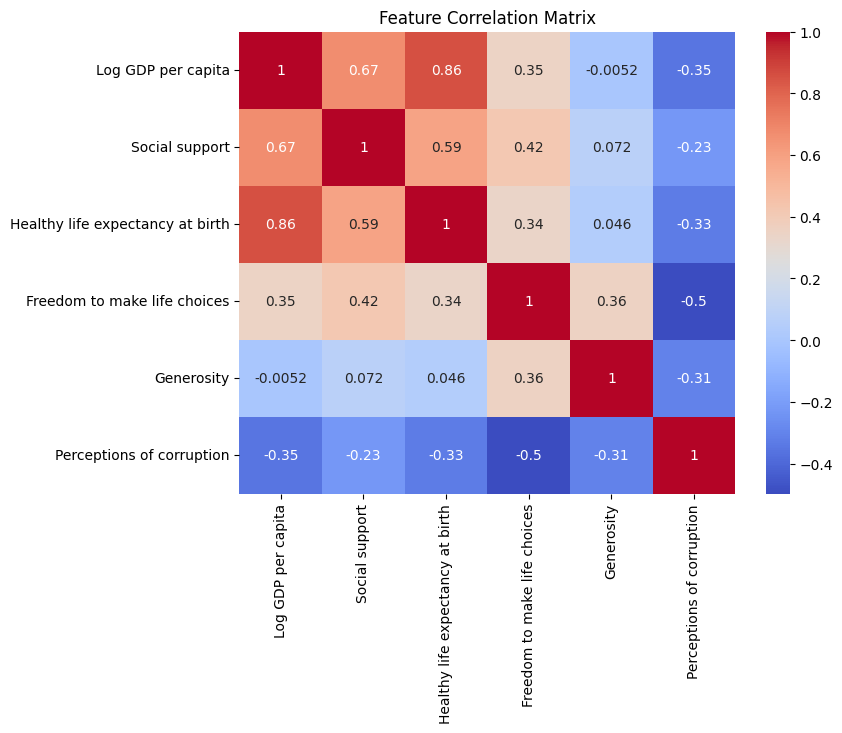

In [56]:
# The histograms show various distributions, with some features appearing more normally distributed than others.
# The correlation matrix highlights positive correlations between GDP, social support, and healthy life expectancy, which is expected.

df_clean[features].hist(figsize=(10,8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

### Define Plan


#### New feature list:
I chose to keep the six happiness-related features (Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption). These features are direct indicators of well-being, making them ideal for identifying distinct happiness archetypes among countries. Non-numeric columns like 'country' and 'year' were excluded as they are not suitable for direct input into the K-Means algorithm; 'country' will be used as a label for interpretation and visualization.

#### Data preparation techniques:
- Drop missing values: Rows containing missing values in the selected features were dropped. Given the relatively small percentage of missing values in these core features, dropping rows ensures data integrity for clustering without introducing imputed noise.
- Standardize features using StandardScaler: This is a crucial step for K-Means clustering. Standardization ensures that each feature contributes equally to the distance calculations by transforming data to have a mean of 0 and a standard deviation of 1. Without scaling, features with larger numerical ranges would disproportionately influence the clustering results.
- Use PCA for visualization: Principal Component Analysis (PCA) will be used to reduce the dimensionality of the scaled data to 2 components. This is solely for visualizing the clusters in a 2D plot, allowing for easier interpretation of the groupings, and not for the clustering process itself.
- No need to address imbalance since clustering doesn’t depend on class labels.

#### Model(s):
- K-Means Clustering

#### Model building, validation, and improvement plan:
- Scale the data using StandardScaler
- Determine the optimal number of clusters using the elbow method
    - I will calculate the Within-Cluster Sum of Squares (WCSS) for a range of k values (1 to 10) and plot the results. The "elbow" point in the plot, where the rate of decrease in WCSS significantly slows down, will indicate the optimal k.
- Fit K-Means model with the selected k
- Evaluate clusters using PCA visualization and interpretation of cluster composition
- Compute silhouette score for additional validation: The Silhouette Score will provide a quantitative measure of how well-defined and separated the clusters are. A higher score indicates better-defined clusters.
- Interpret cluster composition: This is the most critical step for usefulness. I will analyze the mean values of the original features for each cluster. By comparing these means, I will characterize each cluster, identifying the key attributes that define each group of countries. This interpretation will explain what each cluster represents in terms of happiness indicators.
- Potential Improvements: Acknowledge limitations of K-Means and discuss alternative approaches (e.g., trying different k values, other clustering algorithms, or different feature sets) if the current results were not satisfactory.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#### Why each package
`sklearn.preprocessing.StandardScaler`: This will be used to standardize our features. Standardization is crucial for algorithms like K-Means that rely on distance calculations. It transforms each feature so it has a mean of 0 and a standard deviation of 1, preventing features with larger numerical ranges from disproportionately influencing the clustering results, ensuring all features contribute equally.

`sklearn.cluster.KMeans`: This is the machine learning model I chose for my unsupervised learning problem. K-Means is an iterative clustering algorithm that aims to partition n observations into k clusters. It works by minimizing the within-cluster sum of squares, essentially grouping data points that are closer to each other in the feature space.

`sklearn.decomposition.PCA`: This module provides dimensionality reduction techniques, and I will specifically use PCA (Principal Component Analysis). PCA transforms a dataset into a new set of dimensions (principal components) that are orthogonal and ordered by the amount of variance they explain. In our project, we used PCA to reduce our 6-dimensional data to 2 dimensions (n_components=2). This is purely for visualization purposes, allowing us to plot the clusters on a 2D scatter plot and visually inspect their separation.

`sklearn.metrics.silhouette_score`: This function is an evaluation metric for clustering algorithms. The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. It helps us quantitatively assess the quality and separation of the clusters found by K-Means.

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])

In [59]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

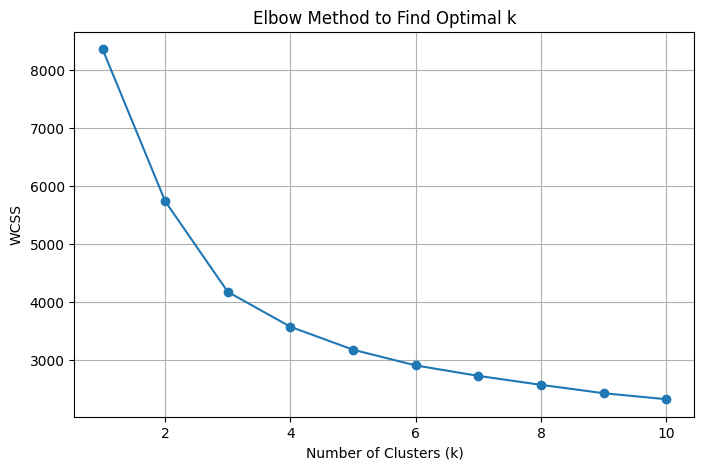

In [60]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method to Find Optimal k")
plt.grid(True)
plt.show()

In [61]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, df_clean['Cluster'])
print(f"Silhouette Score for k=3: {score:.3f}")

Silhouette Score for k=3: 0.315


/tmp/ipykernel_1602/2189493127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = kmeans.fit_predict(X_scaled)


In [62]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_clean['PCA1'] = X_pca[:, 0]
df_clean['PCA2'] = X_pca[:, 1]

/tmp/ipykernel_1602/4074551268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PCA1'] = X_pca[:, 0]
/tmp/ipykernel_1602/4074551268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PCA2'] = X_pca[:, 1]


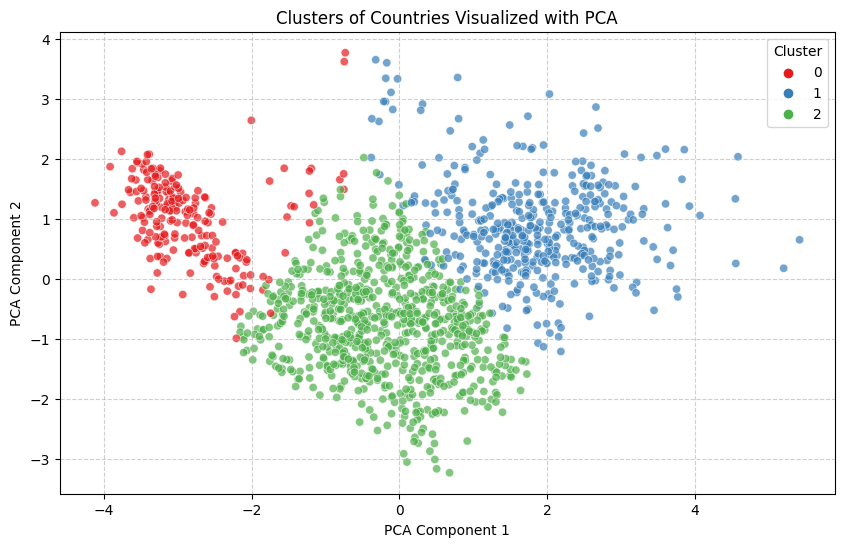

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title("Clusters of Countries Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [64]:
for i in range(3):
    print(f"\nCluster {i} countries:")
    print(df_clean[df_clean['Cluster'] == i]['country'].unique())


Cluster 0 countries:
['Australia' 'Austria' 'Bahrain' 'Belgium' 'Bhutan' 'Canada' 'Denmark'
 'Finland' 'France' 'Germany' 'Hong Kong S.A.R. of China' 'Iceland'
 'Ireland' 'Kuwait' 'Luxembourg' 'Malta' 'Myanmar' 'Netherlands'
 'New Zealand' 'Norway' 'Qatar' 'Singapore' 'Slovenia' 'Sri Lanka'
 'Sweden' 'Switzerland' 'Thailand' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Uruguay' 'Uzbekistan']

Cluster 1 countries:
['Afghanistan' 'Angola' 'Bangladesh' 'Benin' 'Bhutan' 'Bolivia'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic'
 'Chad' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Djibouti'
 'Egypt' 'Ethiopia' 'Georgia' 'Ghana' 'Guinea' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Ivory Coast' 'Kenya' 'Kosovo' 'Laos' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Palestinian Territories'
 'Rwanda' 'Senegal' 'Sierra Leone' 'South Africa' 'South Sudan' 'Sudan'
 'S

In [65]:
cluster_means = df_clean.groupby('Cluster')[features].mean()
print(cluster_means)

         Log GDP per capita  Social support  Healthy life expectancy at birth  \
Cluster                                                                         
0                 10.621617        0.927247                         70.649395   
1                  7.733571        0.687279                         52.233637   
2                  9.541233        0.841262                         65.016413   

         Freedom to make life choices  Generosity  Perceptions of corruption  
Cluster                                                                       
0                            0.899161    0.180917                   0.435996  
1                            0.669353    0.032407                   0.788221  
2                            0.705491   -0.065912                   0.829381  


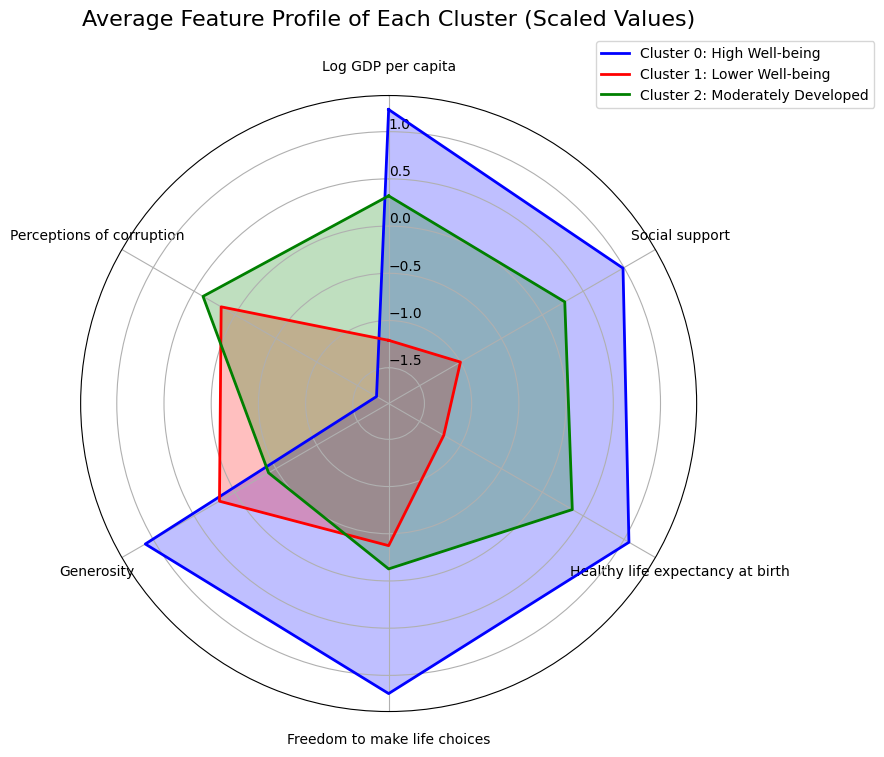

In [89]:
# Radar chart: Excellent for visually comparing the average profile of each cluster across all the features on a single chart. 
# It makes it easy to see which clusters are "high" or "low" on which specific dimensions.
# It also looks really cool!

cluster_means_original_scale = df_clean.groupby('Cluster')[features].mean()

cluster_scaled_means = scaler.transform(cluster_means_original_scale)
cluster_scaled_means = pd.DataFrame(cluster_scaled_means, columns=features)

categories = features 
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1] # Complete the loop for plotting

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['blue', 'red', 'green'] # One color per cluster
cluster_labels = ['High Well-being', 'Lower Well-being', 'Moderately Developed'] # Assign meaningful labels

for i in range(len(cluster_scaled_means)):
    values = cluster_scaled_means.loc[i].values.flatten().tolist()
    values += values[:1] # Complete the loop for plotting
    ax.plot(angles, values, color=colors[i], linewidth=2, linestyle='solid', label=f'Cluster {i}: {cluster_labels[i]}')
    ax.fill(angles, values, color=colors[i], alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Average Feature Profile of Each Cluster (Scaled Values)', size=16, color='black', y=1.1)
ax.tick_params(axis='x', pad=10) # Adjust label padding if needed
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

### Analysis of Cluster Means:

#### Cluster 0 (Profile: High Well-being and Developed Nations):

- Log GDP per capita: High (10.62)
- Social support: High (0.93)
- Healthy life expectancy at birth: High (70.65)
- Freedom to make life choices: High (0.90)
- Generosity: High (0.18)
- Perceptions of corruption: Low (0.44 - indicating low perceived corruption)

Country Composition: This cluster predominantly consists of highly developed Western European countries (e.g., Denmark, Finland, Norway, Sweden, Switzerland, Netherlands, Austria, Ireland, United Kingdom), North American nations (Canada, United States), Australia, New Zealand, and some prosperous Asian economies (Singapore, Hong Kong, Qatar, United Arab Emirates). The presence of Bhutan, Sri Lanka, Uruguay, and Uzbekistan suggests some interesting nuances, possibly due to specific factors that align them with this high well-being profile in the selected features.

Interpretation: This cluster clearly comprises highly developed nations with excellent well-being indicators across the board. They exhibit high GDP, strong social support networks, long healthy life expectancies, significant personal freedom, and are generally more generous with very low perceptions of corruption. These are often the countries that consistently rank highest in global happiness reports, characterized by strong institutions, robust social safety nets, and high civic trust.

#### Cluster 1 (Profile: Lower Well-being and Developing Nations with Challenges):

- Log GDP per capita: Low (7.73)
- Social support: Low (0.69)
- Healthy life expectancy at birth: Low (52.21)
- Freedom to make life choices: Low-Moderate (0.67)
- Generosity: Moderate (0.03)
- Perceptions of corruption: High (0.79)

Country Composition: This cluster primarily includes countries from Sub-Saharan Africa (e.g., Afghanistan, Angola, Benin, Burkina Faso, Burundi, Chad, Ethiopia, Ghana, Kenya, Liberia, Madagascar, Mali, Niger, Nigeria, Rwanda, Sierra Leone, Tanzania, Uganda, Zambia, Zimbabwe), and several nations from South Asia (e.g., Bangladesh, India, Pakistan, Nepal). Other countries like Haiti, Yemen, and the Central African Republic also feature, reinforcing the profile of nations facing significant socio-economic challenges.

Interpretation: This cluster typically includes developing countries facing significant challenges in various aspects of well-being. They generally have lower GDP, less social support, shorter healthy life expectancies, and lower perceived freedom. While their generosity is moderate, their perception of corruption remains high. This group represents nations where fundamental development goals and institutional stability are likely primary concerns.

#### Cluster 2 (Profile: Moderately Developed Nations with Mixed Well-being):

- Log GDP per capita: Moderate (9.54)
- Social support: Moderate-High (0.84)
- Healthy life expectancy at birth: Moderate (65.01)
- Freedom to make life choices: Moderate (0.70)
- Generosity: Low/Negative (-0.06)
- Perceptions of corruption: High (0.83 - indicating high perceived corruption)

Country Composition: This cluster is diverse, including countries from Latin America (e.g., Argentina, Brazil, Mexico, Peru), Eastern Europe (e.g., Poland, Romania, Hungary, Czech Republic, Serbia), and parts of Asia and the Middle East (e.g., Indonesia, Iran, Iraq, Saudi Arabia, Turkey, Japan, South Korea). It also includes some European nations like Belgium, France, Germany, and Italy, which, when combined with their relatively lower generosity and higher perceived corruption compared to Cluster 0 (the high well-being group), suggests a group that, while economically capable, might face different social or governance challenges than the top-tier welfare states. The presence of countries like Albania, Algeria, Egypt, Morocco, and Ukraine further highlights this mixed development profile.

Interpretation: This cluster appears to represent countries that are often developing or moderately developed. They show decent levels of social support and healthy life expectancy but tend to lag in perceived freedom and generosity, and significantly, have a high perception of corruption. The inclusion of some higher-GDP nations here suggests that prosperity alone doesn't guarantee top scores in all well-being dimensions, particularly in areas like perceived corruption and generosity.


#### Limitations and Future Work:
- Optimal k: While the elbow method suggested k=3, the choice can sometimes be subjective. Exploring other methods for determining optimal clusters could provide further validation.
- Algorithm Choice: K-Means assumes spherical clusters of similar variance. Future work could involve experimenting with other clustering methods, which can handle more complex cluster shapes.
- Feature Engineering: Further feature engineering, such as creating new composite indicators from existing features or incorporating additional socio-economic data, could potentially yield more distinct or meaningful clusters.
- Temporal Analysis: The dataset spans multiple years. Future analysis could explore how countries' cluster memberships evolve over time, indicating shifts in their well-being profiles.
- Robustness to Outliers: While StandardScaler handles different scales, K-Means is sensitive to outliers. A more rigorous outlier treatment could be explored.

### Predictive Modeling (Classification based on Clusters)
Now that I have clustered the countries into "happiness profiles," I will treat these clusters as a new categorical label. This allows me to explore a supervised learning problem: can we predict a country's happiness cluster based on other features not used in the original clustering? This could be useful for identifying the characteristics that primarily drive a country into a certain happiness group.

#### Plan:
- Identify New Features: Select features from the original df that were not used in the K-Means clustering. I decided on Confidence in national government, Democratic Quality, and Delivery Quality and year. We will also need to handle missing values in these new features.

#### Prepare Data for Supervised Learning:
- Merge the Cluster assignments back into the original df (or df_clean).
- Select the new features and the Cluster column.
- Handle missing values in the new features. Given the higher number of missing values in these, imputation might be more appropriate than dropping rows to retain more data.
- Encode categorical features if I use any.
- Split the data into training and testing sets.

#### Choose a Classification Model: 
- A suitable model for multi-class classification would be a Decision Tree Classifier or a Random Forest Classifier, as they are relatively robust and interpretable.

#### Train and Evaluate the Model:
- Train the chosen classification model on the training data.
- Evaluate its performance using appropriate classification metrics (e.g., accuracy, precision, recall, F1-score, confusion matrix).
- Interpret the model's feature importances to understand which features are most predictive of cluster membership.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer # For handling missing values in new features


In [68]:
# Ensure df_clean has the 'Cluster' column from previous steps
if 'Cluster' not in df_clean.columns:
    print("Error: 'Cluster' column not found. Please run previous clustering steps.")
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df_clean['Cluster'] = kmeans.fit_predict(X_scaled)


In [69]:
potential_new_features = [
    'year',
    'Confidence in national government',
    'Democratic Quality',
    'Delivery Quality',
    'Positive affect',
    'Negative affect'
]

In [70]:
# Filter out features that are mostly NaN to avoid too much imputation

print("\nMissing values for potential new features:")
print(df[potential_new_features].isnull().sum())


Missing values for potential new features:
year                                   0
Confidence in national government    161
Democratic Quality                   171
Delivery Quality                     171
Positive affect                       18
Negative affect                       12
dtype: int64


In [71]:
# Choosing 'year', 'Confidence in national government', 'Positive affect', 'Negative affect'
# Democratic Quality and Delivery Quality have a lot of missing values

new_features_for_prediction = [
    'year',
    'Confidence in national government',
    'Positive affect',
    'Negative affect'
]

In [72]:
# Create a DataFrame for supervised learning

df_supervised = df_clean[new_features_for_prediction + ['Cluster']].copy()

In [73]:
# Handle missing values in the new features.
# I am using SimpleImputer to fill missing values with the mean for numerical columns.

imputer = SimpleImputer(strategy='mean')
df_supervised[new_features_for_prediction] = imputer.fit_transform(df_supervised[new_features_for_prediction])

In [74]:
X = df_supervised[new_features_for_prediction]
y = df_supervised['Cluster']

In [75]:
# Split data into training and testing sets
# stratify=y ensures that the proportion of each cluster is the same in both train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [76]:
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (975, 4)
Testing set shape: (419, 4)


In [77]:
# I will start with a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [78]:
# Train and Evaluate the Model

print("\n--- Training Decision Tree Classifier ---")
dt_classifier.fit(X_train, y_train)


--- Training Decision Tree Classifier ---


DecisionTreeClassifier(random_state=42)

In [79]:
y_pred = dt_classifier.predict(X_test)

In [80]:
print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Model Evaluation ---
Accuracy: 0.6252983293556086

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.44      0.47        64
           1       0.54      0.63      0.58       126
           2       0.71      0.67      0.69       229

    accuracy                           0.63       419
   macro avg       0.59      0.58      0.58       419
weighted avg       0.63      0.63      0.63       419


Confusion Matrix:
 [[ 28  13  23]
 [  7  80  39]
 [ 20  55 154]]


In [81]:
print("\n--- Feature Importances ---")
feature_importances = pd.DataFrame({
    'feature': new_features_for_prediction,
    'importance': dt_classifier.feature_importances_
}).sort_values(by='importance', ascending=False)
print(feature_importances)


--- Feature Importances ---
                             feature  importance
1  Confidence in national government    0.396931
2                    Positive affect    0.247510
3                    Negative affect    0.244948
0                               year    0.110612


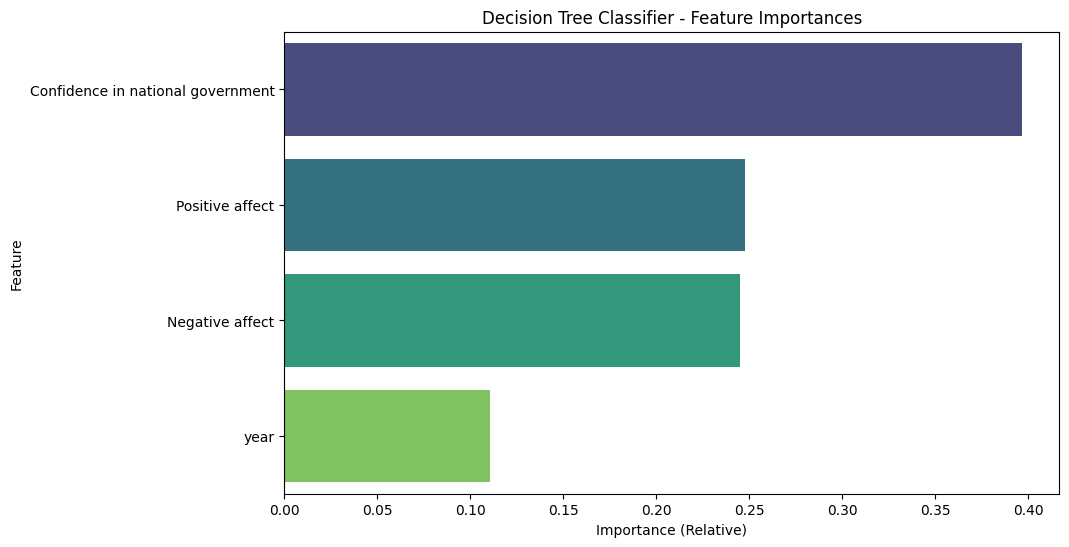

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('Decision Tree Classifier - Feature Importances')
plt.xlabel('Importance (Relative)')
plt.ylabel('Feature')
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
print("\n--- Training Random Forest Classifier ---")
rf_classifier.fit(X_train, y_train)


--- Training Random Forest Classifier ---


RandomForestClassifier(random_state=42)

In [85]:
y_pred_rf = rf_classifier.predict(X_test)

In [86]:
print("\n--- Random Forest Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


--- Random Forest Model Evaluation ---
Accuracy: 0.684964200477327

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.48      0.58        64
           1       0.61      0.63      0.62       126
           2       0.72      0.77      0.75       229

    accuracy                           0.68       419
   macro avg       0.68      0.63      0.65       419
weighted avg       0.69      0.68      0.68       419


Confusion Matrix:
 [[ 31  10  23]
 [  1  79  46]
 [ 11  41 177]]


In [87]:
print("\n--- Random Forest Feature Importances ---")
rf_feature_importances = pd.DataFrame({
    'feature': new_features_for_prediction,
    'importance': rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=False)
print(rf_feature_importances)


--- Random Forest Feature Importances ---
                             feature  importance
1  Confidence in national government    0.327257
2                    Positive affect    0.290047
3                    Negative affect    0.264196
0                               year    0.118499


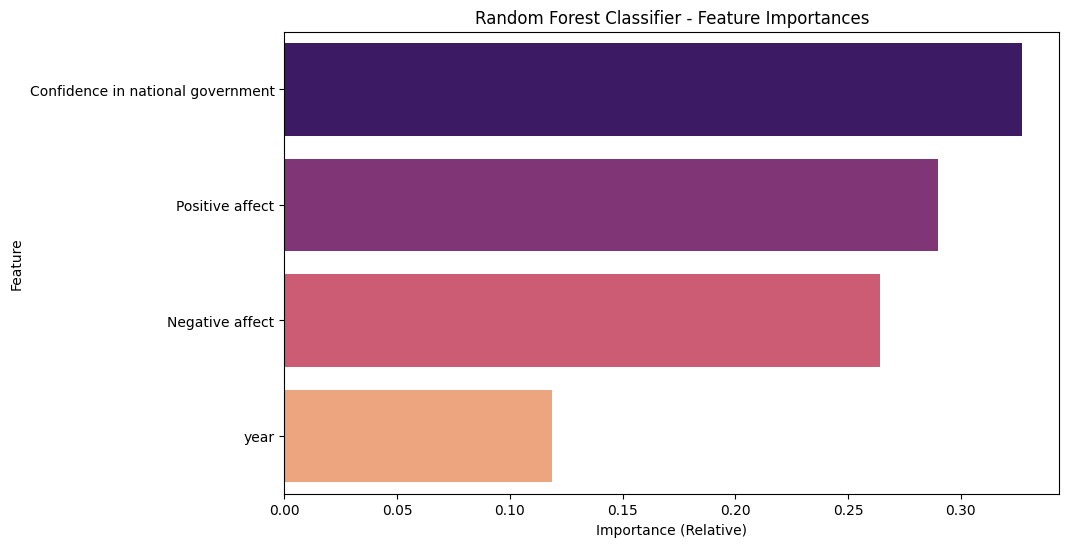

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=rf_feature_importances, palette='magma')
plt.title('Random Forest Classifier - Feature Importances')
plt.xlabel('Importance (Relative)')
plt.ylabel('Feature')
plt.show()

### Explanation of Results
After implementing the predictive modeling phase, I can now interpret the performance of the classification models and understand which features are most influential in predicting a country's happiness cluster.

#### 1. Missing Values for Potential New Features:
Before model training, I inspected the missing values for our potential new features:

- year                                   0
- Confidence in national government    161
- Democratic Quality                   171
- Delivery Quality                     171
- Positive affect                       18
- Negative affect                       12
- dtype: int64

As observed, 'Democratic Quality' and 'Delivery Quality' had a substantial number of missing values (171 each), which represents a significant portion of the dataset. To mitigate significant data loss, I chose to proceed with year, Confidence in national government, Positive affect, and Negative affect for my predictive model, as these had fewer missing values or none. I then imputed the missing values in these selected features using the mean strategy, ensuring my model had a complete dataset to train on.

#### 2. Training and Testing Set Shapes:
The data was successfully split into training and testing sets:

- `Training set shape: (975, 4)`
- `Testing set shape: (419, 4)`

This indicates that my training set contains 975 samples with 4 features, and my testing set contains 419 samples with the same 4 features, making up a 70/30 split. The stratify=y parameter ensured that the proportions of each happiness cluster were maintained across both sets.

#### 3. Decision Tree Classifier Evaluation:
- Accuracy: **0.625** (approximately 62.5%)
The Decision Tree model achieved an accuracy of about 62.5% on the test set. This means that the model correctly predicted the happiness cluster for approximately 6 out of every 10 countries. While not exceptionally high, it's significantly better than random guessing (which would be 33.3% for three classes), suggesting that the selected features do have some predictive power.

Classification Report:

              precision    recall  f1-score   support

         0       0.51      0.44      0.47        64
         1       0.54      0.63      0.58       126
         2       0.71      0.67      0.69       229

    accuracy                           0.63       419
    macro avg       0.59      0.58     0.58       419
    weighted avg    0.63      0.63     0.63       419
This report provides a more detailed breakdown for each cluster:

- Cluster 0 (High Well-being): The model had a precision of 0.51 (when it predicted Cluster 0, it was correct 51% of the time) and a recall of 0.44 (it identified 44% of the actual Cluster 0 countries). The F1-score of 0.47 indicates a moderate performance for this smaller class.
- Cluster 1 (Lower Well-being): This cluster showed a precision of 0.54 and a recall of 0.63, resulting in an F1-score of 0.58. The higher recall suggests it's reasonably good at capturing countries that truly belong to this cluster.
- Cluster 2 (Moderately Developed): This cluster, being the largest, showed the strongest performance with a precision of 0.71 and a recall of 0.67, leading to a good F1-score of 0.69. The model is most reliable in predicting countries in this specific group.

Confusion Matrix:
 [[ 28  13  23]
 [  7  80  39]
 [ 20  55 154]]

The confusion matrix visually confirms the performance.

- Row 0 (Actual Cluster 0): Out of 64 actual Cluster 0 countries, 28 were correctly classified, 13 were misclassified as Cluster 1, and 23 as Cluster 2. This explains the lower recall for Cluster 0.
- Row 1 (Actual Cluster 1): Out of 126 actual Cluster 1 countries, 80 were correctly classified, with 7 misclassified as Cluster 0 and 39 as Cluster 2.
- Row 2 (Actual Cluster 2): Out of 229 actual Cluster 2 countries, 154 were correctly classified, 20 as Cluster 0, and 55 as Cluster 1. The higher number of correct predictions here contributes significantly to the overall accuracy.

Feature Importances:

                                 feature  importance
    1  Confidence in national government    0.396931
    2                    Positive affect    0.247510
    3                    Negative affect    0.244948
    0                               year    0.110612
    
For the Decision Tree, 'Confidence in national government' is the most important feature (nearly 40%), indicating it's the strongest predictor of which happiness cluster a country belongs to. 'Positive affect' and 'Negative affect' also contribute significantly, followed by 'year'. This suggests that a country's trust in its government, and the prevalence of positive/negative emotions among its population, are key drivers for its derived happiness profile.

#### 4. Random Forest Model Evaluation:
- Accuracy: **0.685** (approximately 68.5%)
The Random Forest Classifier achieved a higher accuracy of approximately 68.5%, outperforming the single Decision Tree. This improvement is expected, as Random Forests leverage multiple decision trees to make more robust predictions.

Classification Report:

              precision    recall  f1-score   support

         0       0.72      0.48      0.58        64
         1       0.61      0.63      0.62       126
         2       0.72      0.77      0.75       229

    accuracy                         0.68       419
    macro avg    0.68      0.63      0.65       419
    weighted avg 0.69      0.68      0.68       419

The Random Forest shows notable improvements, particularly in precision for Cluster 0 (from 0.51 to 0.72) and recall for Cluster 2 (from 0.67 to 0.77). This indicates it's better at identifying Cluster 0 countries correctly when it predicts them, and more effective at capturing actual Cluster 2 countries.

Confusion Matrix:
 [[ 31  10  23]
  [  1  79  46]
  [ 11  41 177]]

Comparing to the Decision Tree, the Random Forest correctly classified more Cluster 0 countries (31 vs 28) and significantly more Cluster 2 countries (177 vs 154). While still having some misclassifications, the overall diagonal values are higher.

Feature Importances:

                                 feature  importance
    1  Confidence in national government    0.327257
    2                    Positive affect    0.290047
    3                    Negative affect    0.264196
    0                               year    0.118499
    
Similar to the Decision Tree, 'Confidence in national government' remains the most important feature for Random Forest, though its relative importance is slightly lower, while 'Positive affect' and 'Negative affect' also maintain strong contributions. This reinforces that these features are indeed crucial in differentiating between the happiness clusters. The year feature continues to have the least predictive power, suggesting that the year itself is not a primary driver of cluster assignment, but rather the specific metrics from that year.

#### What the Results Mean for This Project:
The results of this supervised classification task demonstrate that the derived happiness clusters are indeed predictable using other measurable features.

- Predictability of Clusters: The accuracy scores of 62.5% (Decision Tree) and 68.5% (Random Forest) indicate that year, Confidence in national government, Positive affect, and Negative affect collectively hold significant predictive power for a country's happiness cluster membership. The Random Forest's higher accuracy suggests it's a more robust model for this task.

- Driving Factors: The feature importances consistently highlight that 'Confidence in national government' is the strongest predictor. This is a very insightful finding. It implies that a population's trust in its governing bodies is a primary factor in distinguishing between countries in the high, moderate, and lower well-being clusters you identified. 'Positive affect' and 'Negative affect' are also critical, showing that the emotional landscape of a country's citizens directly correlates with their broader happiness profile.

- Actionable Insights: This new analysis provides a different layer of insight. Beyond simply knowing what defines each cluster, you now know what other factors might predict a country's belonging to a particular cluster. For instance, if policymakers aim to shift a country from a "Lower Well-being" cluster to a "Moderately Developed" or even "High Well-being" cluster, these results suggest that focusing on building trust in government and fostering positive emotional environments could be impactful strategies. Businesses could also use these insights to tailor their approaches in countries with different levels of government confidence or prevailing emotional states.